## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, I will be working to understand the results of an A/B test run by an e-commerce website. My goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('The number of rows in the dataset is {}.'.format(df.shape[0]))

The number of rows in the dataset is 294478.


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {}.'.format(df.user_id.nunique()))

The number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [5]:
print('The proportion of users converted is {}.'.format(df['converted'].mean()))

The proportion of users converted is 0.11965919355605512.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
no_match = df.query('landing_page=="new_page"& group!="treatment"').shape[0] + df.query('landing_page!="new_page"& group=="treatment"').shape[0]
print('The number of times the new_page and treatment don\'t line up is {}.'.format(no_match))

The number of times the new_page and treatment don't line up is 3893.


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


>There are no rows with missing values.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Query to return only when new_page is aligned with treatment and also when old_page is aligned with control.
df2 = df.query(('landing_page=="new_page"& group=="treatment" or landing_page=="old_page"& group=="control"'))

In [9]:
# Double Check all of the correct rows were removed - this should be 0.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

> This shows that there are 290,585 entries in the new dataset, 290,584 of which have unique IDs.

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> user_id 773192 has a duplicate entry.

c. What is the row information for the repeat **user_id**? 

In [12]:
df.query("user_id=='773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> For the duplicated user_id; the group, landing_page and converted column values match. Therefore, we can drop one of these entries.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(subset='user_id')

In [14]:
# Confirm there are no more duplicated user_ids
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print('The probability of an individual converting regardless of the page they receive is {}.'.format(df2.converted.mean()))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2.query('group=="control"')
control_convert = control.query('converted=="1"').shape[0]/control.shape[0]
print('The probability of an individual in the control group converting is {}.'.format(control_convert))

The probability of an individual in the control group converting is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment = df2.query('group=="treatment"')
treat_convert = treatment.query('converted=="1"').shape[0]/control.shape[0]
print('The probability of an individual in the treatment group converting is {}.'.format(treat_convert))

The probability of an individual in the treatment group converting is 0.1188375070556328.


d. What is the probability that an individual received the new page?

In [18]:
prob_new = df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]
print('The probability that an individual received the new page is {}.'.format(prob_new))

The probability that an individual received the new page is 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Currently, there is insufficient evidence to suggest that the new treatment page leads to more conversions as the mean values for the whole group, the control group, and the treatment group are all very similar. The control group actually has a slightly higher proportion of conversions. The probability of individuals receiving the new page is about 50% so is well balanced. As the difference in proportion is not significant, further stastical analysis will need to be performed. 

Some limitations include change aversion, the user may have a negative reaction towards the new page as they are used to the old page. Some more information such as the duration users have been interacting with the new page may also help us to make better informed decisions regarding which page is better.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: p_{old} \geq p_{new}$$**
**$$H_1: p_{old} < p_{new}$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [20]:
# As stated above, the success rate is equal to the converted success rate regardless of page.
p_new = df2.converted.mean()
print('The convert rate for p_new under the null is {}.'.format(p_new))

The convert rate for p_new under the null is 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# As stated above, the success rate is equal to the converted success rate regardless of page.
p_old = df2.converted.mean()
print('The convert rate for p_old under the null is {}.'.format(p_old))

The convert rate for p_old under the null is 0.11959708724499628.


c. What is $n_{new}$?

In [22]:
n_new = df2.query("landing_page=='new_page'").shape[0]
print('The number of users with the new landing page is {}.'.format(n_new))

The number of users with the new landing page is 145310.


d. What is $n_{old}$?

In [23]:
n_old = df2.query("landing_page=='old_page'").shape[0]
print('The number of users with the old landing page is {}.'.format(n_old))

The number of users with the old landing page is 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1,p=p_new,size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1,p=p_old,size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_null_diffs = new_page_converted.mean()-old_page_converted.mean()
p_null_diffs

-0.0009176216814851951

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

for x in range(10000):
    new_page_converted = np.random.binomial(1,p=p_new,size=n_new)
    old_page_converted = np.random.binomial(1,p=p_old,size=n_old)
    mean_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(mean_diff)

In [28]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

In [29]:
p_diffs

array([ 0.00041772, -0.00065572, -0.00035326, ..., -0.00048367,
       -0.00088307,  0.00184234])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
obs_mean = treat_convert - control_convert
obs_mean

-0.0015487974448284009

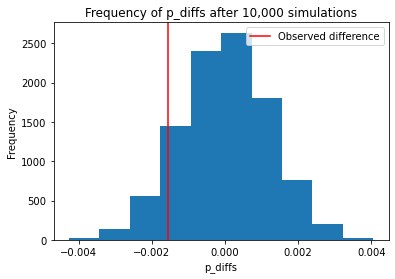

In [31]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Frequency of p_diffs after 10,000 simulations')
plt.axvline(obs_mean,c='red',label='Observed difference')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# our alternative hypothesis states H1: P_old<P_new:
(obs_mean<p_diffs).mean()

0.8985

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- The value calculated in part j is the "p-value".
- The p-value tells us the probability of observing our statistic or a more extreme statistic in favour of our alternative hypothesis. 
- A small p-value, typically 0.05, is associated with the value being statistically significant. This is because the chance of the observed value occuring is low. If the p-value is low (e.g.<0.05), we reject the null hypothesis whereas if the p-value is not low (e.g. >0.05) we fail to reject the null hypothesis.
- As our alternative hypothesis is  $H_1 = P_{𝑜𝑙𝑑}<P_{𝑛𝑒𝑤}$, we want to see how likely it is to observe our observed difference or a greater difference.
- The p-value we have calculated is 0.9041, therefore, there is a 90.41% chance of observing our difference or a greater difference just by random chance. Therefore, we fail to reject the hypothesis as this value is not statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page' and converted=='1'").shape[0]
convert_new = df2.query("landing_page=='new_page' and converted=='1'").shape[0]
n_old = df2.query("landing_page=='old_page'").shape[0]
n_new = df2.query("landing_page=='new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
print('The z-score is {}.'.format(z_score))
print('The p-value is {}.'.format(p_value))

The z-score is 1.3109241984234394.
The p-value is 0.9050583127590245.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [35]:
from scipy.stats import norm

print('The significance of our z-score is {}.'.format(norm.cdf(z_score)))
print('The critical value at a 95% confidence level is {}'.format(norm.ppf(1-(0.05))))

The significance of our z-score is 0.9050583127590245.
The critical value at a 95% confidence level is 1.6448536269514722


The z-score tells us the number of standard deviations you are from the mean. As we require our type I error rate to be a max of 5%, we need our z-score to return a p-value of >0.95. This equates to a >95% confidence and can be achieved with a z-score of >1.645. Our z-score of 1.311 is therefore not high enough for us to reject the null hypothesis.

The p-value of 0.905 obtained by this z-test is very similar to the p-value of 0.904 obtained when a simulation of 10,000 tests was performed binomially. Overall, both methods agree that we have failed to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>A logistic regression will be performed as it is used to predict a categorical response between two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [37]:
# Confirm the ab_page column has been added correctly.
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# Below is a summary of my logistic regression model:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:57:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [40]:
# To interpret our coefficients, we must exponentiate then find the reciprocal of this as our coefficient in the 
# table is negative.

1/np.exp(-0.0150)

1.015113064615719

>This shows that for the treatment group, conversion is 1.015 times less likely than the control group holding all other variables constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190.**

In part II, our hypotheses were as follows:
**$$H_0: p_{old} \geq p_{new}$$**
**$$H_1: p_{old} < p_{new}$$**
Therefore, there was directionality as this was a one-tailed test.

When using logistic regression however, we are performing a two-tailed test and therefore our hypotheses are as follows:

**$$H_0: p_{old} - p_{new} = 0$$**
**$$H_1: p_{old} - p_{new}\neq 0$$**

As we require the p-value to be <0.05, our p-value of 0.190 means we fail to reject the hypothesis also with this model.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There may be other factors that could influence whether an individual converts that we haven't considered yet:**
- It would be useful to know which users are existing users and which users are new. This is because change aversion may be present. The old users may prefer the old page simply because that is what they are used to. Perhaps the users would convert to the new page over time.
- The duration spent on the page, perhaps those who have spent more time on the new page end up converting.
- Age, gender and academic background may also play a role in influencing whether an individual converts to the new page.
- Consider interaction terms. If one variable is related to the value of another variable it may be useful to add higher order terms as it could lead to better predictions of a response.

**There are also disadvantages to adding additional terms to the regression model however:**
- If the additional factors are not statistically important, it may hurt the model. If the model can be built with fewer variables whilst retaining a similar result, then it is preferred. If a variable is removed however, and the model changes significantly, the variable that was removed was important.
- Multicolinearity: If the variables chosen correlate with each other, this can flip the direction of the coefficient leading to misleading results. Variance Inflation Factor (VIFs) can be calculated to quantify the severity of multicolinearity.
- Adding more terms to the regression model increases the likelihood of introducing outliers.
- Whilst interaction terms may improve your prediction for the response, this comes at the expense of those terms becoming harder to interpret when examining their coefficients.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
# List all the countries
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
# Create the necessary dummy variables, only two dummy variables will be required for the model.
df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])

In [44]:
# Confirm additional columns have been added
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [45]:
# Creating and summarising the logistic regression model
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','CA']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        21:57:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [46]:
"""
As this is a logistic regression model, coefficients must be exponentiated and the reciprocal must taken where required.
US coefficient calculation and CA coefficient calculation.
"""
np.exp(0.0506),np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

The coefficient for US is 1.052 and for CA it is 1.042. These coefficients are compared using a baseline of UK. As these values are all very close to 1, the country the individual is from appears to have no effect on conversion as there isn't a significant difference between the three countries. The p-values for US and CA are also >0.05 showing that they are not statistically significant. Therefore, with this model, we have failed to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
# creating US and ab_page interaction
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']

# creating CA and ab_page interaction
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']

In [48]:
### Fit Your Linear Model And Obtain the Results
logit2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','CA','US_ab_page','CA_ab_page']])
results = logit2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:57:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0118      0.040      0.296      0.767      -0.066       0.090
CA             0.0175      0.038      0.465      0.642      -0.056       0.091
US_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
CA_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

As interaction terms have been used for US, CA with ab_page; the coefficients for US, CA, US_ab_page and CA_ab_page are no longer easily interpretable. Looking at the p-values for all of the chosen variables, none of them are below the threshold of 0.05. Therefore, none of these have a significant effect on conversion to the new page. Therefore, we have failed to reject the null hypothesis with this model. 

<a id='conclusions'></a>
## Conclusions

All models performed in this project agree that they have failed to reject the null hypothesis. Due to the new page not being significantly better than the old page, the company should keep the old page. The company may decide to run the experiment for longer to see if this changes but with the current data available there is no significant advantage with implementing the new page. There also was no significant effect on conversion depending on which country the individual was from.

**References**
- Limitations of logistic regression: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543767/
- Z-Score Table: http://www.z-table.com/
- Z-Test: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html